In [2]:
import numpy as np
import os
import glob
import cv2
from random import choice
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import scale,LabelEncoder,LabelBinarizer,MinMaxScaler,OrdinalEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.layers import  Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate, BatchNormalization, Conv2D, Activation, Dropout, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import losses
from datetime import date
from collections import Counter
import category_encoders as ce
import locale
from fuzzywuzzy import process
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from random import choices
import random
r = random.Random(101)
random.seed(101)

In [49]:
path = '../data/raw/Houses Dataset/'

In [122]:
images = []
labels = []
shape = (128,128)
for filename in os.listdir(path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(path,filename))
        
        # Spliting file names and storing the labels for image in list
        labels.append(filename.replace('.jpg','').split('_')[1])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        images.append(img)



frontal


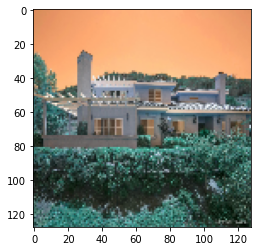

In [123]:
print(labels[50])
plt.imshow(images[50])
plt.show()

In [124]:
# Converting labels into One Hot encoded sparse matrix
labels = pd.get_dummies(labels).values

# Converting train_images to array
images = np.array(images)



In [125]:
images[0]

array([[[132, 148, 161],
        [133, 148, 160],
        [131, 148, 159],
        ...,
        [174, 179, 175],
        [173, 179, 174],
        [169, 175, 168]],

       [[130, 146, 159],
        [130, 146, 158],
        [130, 147, 159],
        ...,
        [175, 179, 178],
        [173, 178, 174],
        [157, 165, 160]],

       [[130, 147, 157],
        [130, 147, 158],
        [128, 147, 158],
        ...,
        [174, 179, 174],
        [170, 176, 169],
        [132, 141, 140]],

       ...,

       [[133, 146, 163],
        [148, 158, 172],
        [157, 166, 177],
        ...,
        [102, 121, 136],
        [103, 123, 136],
        [101, 122, 135]],

       [[146, 159, 174],
        [150, 161, 173],
        [148, 158, 172],
        ...,
        [ 97, 119, 135],
        [ 79, 102, 117],
        [ 83, 107, 123]],

       [[143, 156, 171],
        [142, 153, 170],
        [146, 156, 169],
        ...,
        [ 99, 119, 132],
        [105, 126, 138],
        [104, 125, 138]]

In [126]:
images = images/255.0
# Splitting Training data into train and validation dataset
X_train,X_test,y_train,y_test = train_test_split(images,labels, random_state=100)

In [133]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(128,128,3,)))
model.add(Conv2D(filters=16,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=16,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=16,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [134]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 124, 124, 16)      4624      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
flatten_7 (Flatten)          (None, 12544)            

In [135]:
history = model.fit(X_train,y_train,epochs=40,batch_size=10,validation_data=(X_test,y_test),callbacks=[early_stopping])

Train on 1605 samples, validate on 535 samples
Epoch 1/40
1605/1605 [==============================] - 44s 28ms/sample - loss: 1.0982 - acc: 0.4922 - val_loss: 0.9642 - val_acc: 0.5701
Epoch 2/40
1605/1605 [==============================] - 44s 27ms/sample - loss: 0.7664 - acc: 0.6879 - val_loss: 0.7856 - val_acc: 0.7065
Epoch 3/40
1605/1605 [==============================] - 44s 27ms/sample - loss: 0.6395 - acc: 0.7433 - val_loss: 0.7703 - val_acc: 0.6991
Epoch 4/40
1605/1605 [==============================] - 45s 28ms/sample - loss: 0.5330 - acc: 0.7988 - val_loss: 0.9038 - val_acc: 0.6579
Epoch 5/40
1605/1605 [==============================] - 45s 28ms/sample - loss: 0.4134 - acc: 0.8393 - val_loss: 0.8497 - val_acc: 0.6972
Epoch 6/40
1605/1605 [==============================] - 45s 28ms/sample - loss: 0.2613 - acc: 0.9040 - val_loss: 0.8355 - val_acc: 0.7215
Epoch 7/40
1605/1605 [==============================] - 49s 30ms/sample - loss: 0.1376 - acc: 0.9558 - val_loss: 0.9275 - val

In [156]:
arr = os.listdir('../data/raw/Image/')
test_images =[]
idx = []
for filename in arr:
    img = cv2.imread(os.path.join('../data/raw/Image/',filename))
    idx.append(filename.split('_')[0])    
    # Resize all images to a specific shape
    img = cv2.resize(img,shape)
        
    test_images.append(img)
test_images = np.array(test_images)

In [159]:
output = { 0:'bathroom',1:'bedroom',2:'frontal',3:'kitchen'}
for i in range(len(test_images)):
    predict = model.predict(np.array(test_images[i:i+1]))
    cv2.imwrite(os.path.join('../data/raw/Labeled Image/' ,(idx[i]+'_'+output[np.argmax(predict)]+'.jpg')), test_images[i])

In [4]:
from tensorflow import keras

In [11]:
model = keras.models.load_model('/Springboard/House/RoomNet/final_model/roomnet.data-00000-of-00001')

ImportError: `load_model` requires h5py.

In [ ]:
!conda install h5py